In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
import numpy as np
import matplotlib.pyplot as plt

2024-03-06 09:31:23.403234: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-06 09:31:23.403363: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-06 09:31:23.553864: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
data = tf.keras.utils.image_dataset_from_directory('/kaggle/input/medidataset/dataset')

Found 2166 files belonging to 6 classes.


In [3]:
data=data.map(lambda x,y:(x/255.0,y))

In [4]:
data_iterator = data.as_numpy_iterator()
batch = data_iterator.next()
images = batch[0]

In [5]:
for idx, img in enumerate(batch[0][:5]):
    print(f"Image {idx + 1} shape:", img.shape, "dtype:", img.dtype)

Image 1 shape: (256, 256, 3) dtype: float32
Image 2 shape: (256, 256, 3) dtype: float32
Image 3 shape: (256, 256, 3) dtype: float32
Image 4 shape: (256, 256, 3) dtype: float32
Image 5 shape: (256, 256, 3) dtype: float32


In [6]:
batch[0].max()

1.0

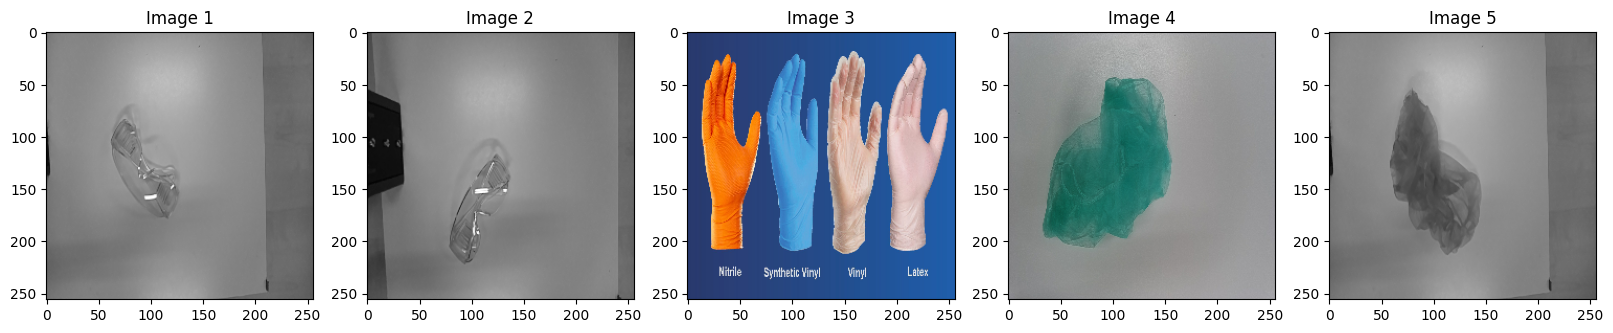

In [7]:
fig, ax = plt.subplots(ncols=5, figsize=(20,20))
for idx, img in enumerate(images[:5]):
    ax[idx].imshow(img)
    ax[idx].set_title(f"Image {idx + 1}")

plt.show()

In [8]:
train_data_tot=int(len(data)*.7)
valid_data_tot=int(len(data)*.2)
test_data_tot = len(data) - train_data_tot - valid_data_tot
data_suffled=data.shuffle(len(data),seed=45)
print(test_data_tot)

8


In [9]:
train_data=data_suffled.take(train_data_tot)
valid_data=data_suffled.skip(train_data_tot).take(valid_data_tot)
test_data=data_suffled.skip(train_data_tot+valid_data_tot).take(test_data_tot)
#len(train_data)
len(test_data)
#len(valid_data)

8

In [10]:
model=Sequential()
model.add(Conv2D(16,(3,3),1,activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(16,(3,3),1,activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(16,(3,3),1,activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(6,activation='softmax'))

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [11]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [12]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 16)   │         2,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 16)     │         2,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 6)              │           390 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,733,286 (14.24 MB)

 Trainable params: 3,733,286 (14.24 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:


# Load your dataset
dataset = tf.keras.utils.image_dataset_from_directory(
    '/kaggle/input/medidataset/dataset',
    batch_size=32,
    image_size=(256, 256),  
    shuffle=True, 
)

# Normalize and resize images
dataset = dataset.map(
    lambda x, y: (tf.image.resize(x, (256, 256)), y)
)
dataset = dataset.cache()
dataset = dataset.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)


Found 2166 files belonging to 6 classes.


In [14]:
training=model.fit(train_data,epochs=18,validation_data= valid_data)

Epoch 1/18
 7/47 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.2412 - loss: 2.4649

I0000 00:00:1709717554.852879     115 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1709717554.872250     115 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


19/47 ━━━━━━━━━━━━━━━━━━━━ 11s 420ms/step - accuracy: 0.2194 - loss: 2.2824

W0000 00:00:1709717562.297446     114 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


47/47 ━━━━━━━━━━━━━━━━━━━━ 93s 934ms/step - accuracy: 0.2260 - loss: 2.0381 - val_accuracy: 0.4351 - val_loss: 1.3653


W0000 00:00:1709717597.633941     113 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


Epoch 2/18
47/47 ━━━━━━━━━━━━━━━━━━━━ 70s 772ms/step - accuracy: 0.5169 - loss: 1.2372 - val_accuracy: 0.6562 - val_loss: 0.9809
Epoch 3/18
47/47 ━━━━━━━━━━━━━━━━━━━━ 70s 767ms/step - accuracy: 0.6373 - loss: 0.9160 - val_accuracy: 0.6947 - val_loss: 0.8205
Epoch 4/18
47/47 ━━━━━━━━━━━━━━━━━━━━ 69s 767ms/step - accuracy: 0.7181 - loss: 0.7797 - val_accuracy: 0.7620 - val_loss: 0.6584
Epoch 5/18
47/47 ━━━━━━━━━━━━━━━━━━━━ 69s 771ms/step - accuracy: 0.7501 - loss: 0.6551 - val_accuracy: 0.7115 - val_loss: 0.6619
Epoch 6/18
47/47 ━━━━━━━━━━━━━━━━━━━━ 69s 769ms/step - accuracy: 0.7746 - loss: 0.5963 - val_accuracy: 0.7596 - val_loss: 0.5805
Epoch 7/18
47/47 ━━━━━━━━━━━━━━━━━━━━ 70s 784ms/step - accuracy: 0.7729 - loss: 0.5712 - val_accuracy: 0.8173 - val_loss: 0.5413
Epoch 8/18
47/47 ━━━━━━━━━━━━━━━━━━━━ 70s 769ms/step - accuracy: 0.7987 - loss: 0.5222 - val_accuracy: 0.8365 - val_loss: 0.4316
Epoch 9/18
47/47 ━━━━━━━━━━━━━━━━━━━━ 70s 775ms/step - accuracy: 0.8336 - loss: 0.4426 - val_accu

W0000 00:00:1709718223.631873     116 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


47/47 ━━━━━━━━━━━━━━━━━━━━ 69s 765ms/step - accuracy: 0.8578 - loss: 0.3739 - val_accuracy: 0.9014 - val_loss: 0.2694
Epoch 12/18
47/47 ━━━━━━━━━━━━━━━━━━━━ 69s 771ms/step - accuracy: 0.9113 - loss: 0.2602 - val_accuracy: 0.9111 - val_loss: 0.2417
Epoch 13/18
47/47 ━━━━━━━━━━━━━━━━━━━━ 69s 761ms/step - accuracy: 0.9127 - loss: 0.2434 - val_accuracy: 0.9159 - val_loss: 0.2183
Epoch 14/18
47/47 ━━━━━━━━━━━━━━━━━━━━ 69s 774ms/step - accuracy: 0.9386 - loss: 0.1881 - val_accuracy: 0.9212 - val_loss: 0.1925
Epoch 15/18
47/47 ━━━━━━━━━━━━━━━━━━━━ 69s 764ms/step - accuracy: 0.9451 - loss: 0.1597 - val_accuracy: 0.9557 - val_loss: 0.1324
Epoch 16/18
47/47 ━━━━━━━━━━━━━━━━━━━━ 70s 776ms/step - accuracy: 0.9456 - loss: 0.1544 - val_accuracy: 0.9543 - val_loss: 0.1258
Epoch 17/18
47/47 ━━━━━━━━━━━━━━━━━━━━ 69s 766ms/step - accuracy: 0.9538 - loss: 0.1325 - val_accuracy: 0.9557 - val_loss: 0.1169
Epoch 18/18
47/47 ━━━━━━━━━━━━━━━━━━━━ 69s 760ms/step - accuracy: 0.9650 - loss: 0.1071 - val_accuracy

In [15]:
training.history

{'accuracy': [0.27576974034309387,
  0.5548862218856812,
  0.6599732041358948,
  0.718875527381897,
  0.7469879388809204,
  0.7684069871902466,
  0.7858099341392517,
  0.8072289228439331,
  0.8259705305099487,
  0.8543882966041565,
  0.8748326897621155,
  0.8975903391838074,
  0.90696120262146,
  0.9377509951591492,
  0.9457831382751465,
  0.9491298794746399,
  0.9567819237709045,
  0.966532826423645],
 'loss': [1.7643487453460693,
  1.1301579475402832,
  0.8706414103507996,
  0.7487543821334839,
  0.6556887626647949,
  0.61497563123703,
  0.5585870742797852,
  0.505120038986206,
  0.46615058183670044,
  0.39981967210769653,
  0.34078139066696167,
  0.2840229272842407,
  0.26729729771614075,
  0.19427908957004547,
  0.15884527564048767,
  0.1399776041507721,
  0.12610729038715363,
  0.1025008112192154],
 'val_accuracy': [0.4350961446762085,
  0.65625,
  0.6947115659713745,
  0.7620192170143127,
  0.7115384340286255,
  0.7596153616905212,
  0.817307710647583,
  0.8365384340286255,
  0.8

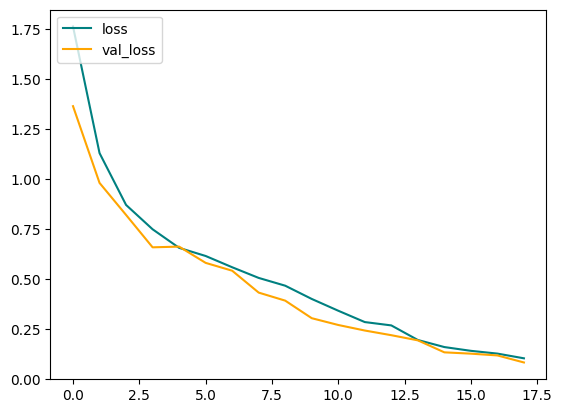

In [16]:
fig=plt.figure()
plt.plot(training.history['loss'],color='teal',label='loss')
plt.plot(training.history['val_loss'],color='orange',label='val_loss')
plt.legend(loc="upper left")
plt.show()

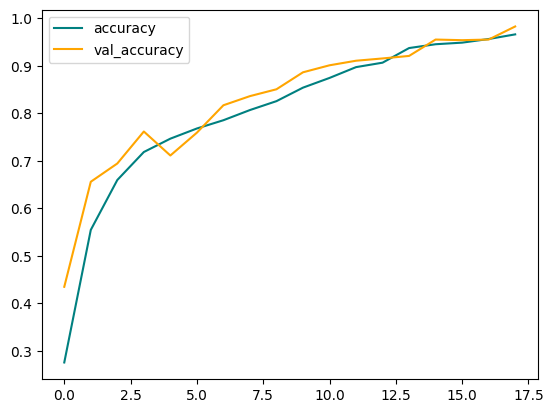

In [17]:
fig=plt.figure()
plt.plot(training.history['accuracy'],color='teal',label='accuracy')
plt.plot(training.history['val_accuracy'],color='orange',label='val_accuracy')
plt.legend(loc="upper left")
plt.show()

In [18]:
from tensorflow.keras.metrics import Precision,Recall,CategoricalAccuracy

In [19]:
pre=Precision()
re=Recall()
acc=CategoricalAccuracy()
len(test_data)

8

In [20]:
for batch in test_data.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    # Convert y to one-hot encoded format if it's not already
    if len(y.shape) == 1:
        y = tf.keras.utils.to_categorical(y, num_classes=6)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 372ms/step


W0000 00:00:1709718810.828246     115 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


In [21]:
print(pre.result(),re.result(),acc.result())

tf.Tensor(0.996063, shape=(), dtype=float32) tf.Tensor(0.98828125, shape=(), dtype=float32) tf.Tensor(0.99609375, shape=(), dtype=float32)


In [22]:
import cv2

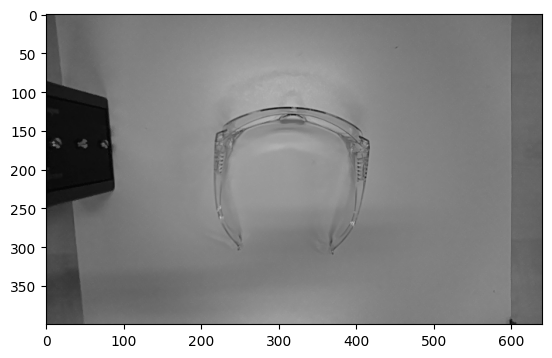

In [23]:
img=cv2.imread('/kaggle/input/medidataset/dataset/medical_glasses/1671115539927_l.png')
plt.imshow(img)
plt.show()


In [24]:
resize=tf.image.resize(img,(256,256))


In [25]:
yhat=model.predict(np.expand_dims(resize/255,0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 881ms/step


In [26]:
yhat = np.array(yhat)
predicted_class = np.argmax(yhat)
print(predicted_class)


3


In [27]:
if predicted_class==5 or predicted_class==3:
    predicted_class=0
else: predicted_class=1

In [28]:
file_path='/kaggle/working/output.txt'
with open(file_path, "w") as file:
    file.write(str(predicted_class))